In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
os.chdir("..")

In [3]:
from scripts.run_real_experiments import LABELED_SWEEP, UNLABELED_SWEEP
from utils import get_budgets, data_value_ratios

In [4]:
results_path = Path("results") / "imdb"
labeled_losses = np.load(results_path / "labeled_losses.npy")
unlabeled_losses_median = np.load(results_path / "unlabeled_losses_median.npy")
unlabeled_losses_mean = np.load(results_path / "unlabeled_losses_mean.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


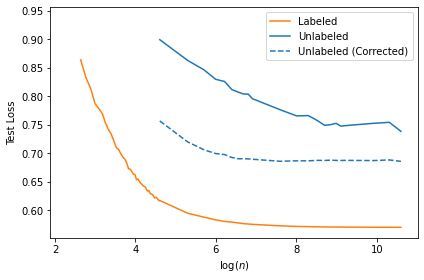

Labeled final loss: 0.5697851034615365
Unabeled final loss: 0.7382068556267636
Unabeled (Corrected) final loss: 0.6855102511887818


In [5]:
n_ls = get_budgets(LABELED_SWEEP)
n_us = get_budgets(UNLABELED_SWEEP)
start_idx = 0

plt.plot(np.log(n_ls)[start_idx:], np.mean(labeled_losses, 0)[start_idx:], color="tab:orange", label="Labeled")
plt.plot(np.log(n_us), np.mean(unlabeled_losses_mean, 0), color="tab:blue", label="Unlabeled")
plt.plot(np.log(n_us), np.mean(unlabeled_losses_median, 0), color="tab:blue", ls="dashed", label="Unlabeled (Corrected)")
plt.xlabel(r"$\log(n)$")
plt.ylabel("Test Loss")
plt.legend()
plt.tight_layout()
plt.savefig("figures/real_biases.eps", format="eps")
plt.show()

print(f"Labeled final loss: {np.mean(labeled_losses, 0)[-1]}")
print(f"Unabeled final loss: {np.mean(unlabeled_losses_mean, 0)[-1]}")
print(f"Unabeled (Corrected) final loss: {np.mean(unlabeled_losses_median, 0)[-1]}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


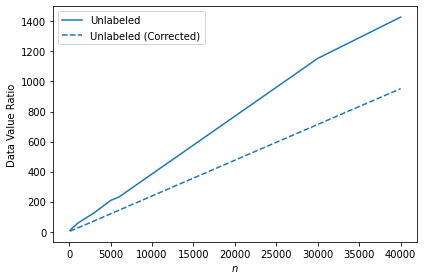

In [6]:
data_value_ratios_mean = data_value_ratios(unlabeled_losses_mean, n_us, labeled_losses, n_ls)
plt.plot(n_us, data_value_ratios_mean, label="Unlabeled", color="tab:blue", ls="solid")

data_value_ratios_median = data_value_ratios(unlabeled_losses_median, n_us, labeled_losses, n_ls)
plt.plot(n_us, data_value_ratios_median, label="Unlabeled (Corrected)", color="tab:blue", ls="dashed")

plt.legend()
plt.ylabel("Data Value Ratio")
plt.xlabel(r"$n$")
plt.tight_layout()
plt.savefig("figures/real_data_value_ratio.eps", format="eps")

In [7]:
combined_results = pickle.load(open(results_path / "combined_results.pkl", "rb"))
combined_results_dict = {
    "n_U": 40000,
    "n_L": combined_results["labeled_score"].keys(),
    "F1_unlabeled": round(combined_results["unlabeled_score"] * 100, 2),
    "F1_labeled": [round(np.mean(combined_results["labeled_score"][budget]) * 100, 2) for budget in combined_results["labeled_score"].keys()],
    "F1_combined": [round(np.mean(combined_results["green_score"][budget]) * 100, 2) for budget in combined_results["labeled_score"].keys()],
}
pd.DataFrame.from_dict(combined_results_dict)

,n_U,n_L,F1_unlabeled,F1_labeled,F1_combined
0,40000,40,68.13,64.81,67.21
1,40000,80,68.13,67.71,68.93
2,40000,120,68.13,68.86,69.67
3,40000,200,68.13,70.00,70.44
4,40000,400,68.13,70.74,71.00
